# Predicting the Species of flowers using Decision Trees


## Importing Libraries
<ul>
    <li> <b>numpy (as np)</b> </li>
    <li> <b>pandas</b> </li>
    <li> <b>DecisionTreeClassifier</b> from <b>sklearn.tree</b> </li>
</ul>

In [1]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

Downloading the dataset

In [5]:
path = "Iris.csv"
df = pd.read_csv(path)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
#size of data
df.shape

(150, 6)

## Pre-processing

Using <b>df</b> as the Iris.csv data read by pandas, we declare the following variables: <br>

<ul>
    <li> <b> X </b> as the <b> Feature Matrix </b> (data of df) </li>
    <li> <b> y </b> as the <b> response vector </b> (target) </li>
</ul>

In [16]:
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
X[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [17]:
y = df["Species"]
y[0:5]

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

<hr>

<div id="setting_up_tree">
    <h2>Setting up the Decision Tree</h2>
    We will be using <b>train/test split</b> on our <b>decision tree</b>. Let's import <b>train_test_split</b> from <b>sklearn.cross_validation</b>.
</div>


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [20]:
#checking the shape of te trainsets to ensure that the dimensions match
print("X_trainset shape: ", X_trainset.shape)
print("y_trainset shape: ", y_trainset.shape)

X_trainset shape:  (105, 4)
y_trainset shape:  (105,)


Perfect! They match!

In [21]:
#checking that the shape of the test sets matches
print("X_testset shape: ", X_testset.shape)
print("y_testset shape: ", y_testset.shape)

X_testset shape:  (45, 4)
y_testset shape:  (45,)


Perfect!  They match!

<hr>

<div id="modeling">
    <h2>Modeling</h2>
    We will first create an instance of the <b>DecisionTreeClassifier</b> called <b>irisTree</b>.<br>
    Inside of the classifier, we specify <i> criterion="entropy" </i> so we can see the information gain of each node.
</div>


In [22]:
irisTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
irisTree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

Next, we wil fit the data with the training feature matrix X_trainset and training response vector y_trainset

In [23]:
irisTree.fit(X_trainset, y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

<hr>

<div id="prediction">
    <h2>Prediction</h2>
    Let's make some <b>predictions</b> on the testing dataset and store it into a variable called <b>predTree</b>.
</div>


In [24]:
predTree = irisTree.predict(X_testset)

In [26]:
# let's print some values to visually compare the predictions to the actual values.
print (predTree [0:5])
print (y_testset [0:5])


['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']
47    Iris-setosa
3     Iris-setosa
31    Iris-setosa
25    Iris-setosa
15    Iris-setosa
Name: Species, dtype: object


<hr>

<div id="evaluation">
    <h2>Evaluation</h2>
    Next, let's import <b>metrics</b> from sklearn and check the accuracy of our model.
</div>


In [27]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.9555555555555556


<hr>

<div id="visualization">
    <h2>Visualization</h2>

Let's visualize the tree

</div>


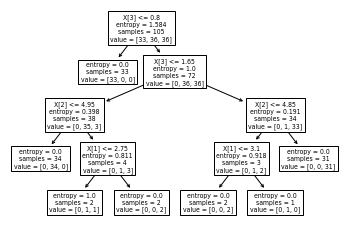

In [28]:
tree.plot_tree(irisTree)
plt.show()